In [0]:
import pandas as pd
import numpy as np


In [0]:
data = pd.read_csv('/content/train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [0]:
proc_data = data.drop(columns = ['PassengerId','Name','Ticket'])
proc_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [0]:
proc_data2 = pd.get_dummies(proc_data,columns = ['Pclass','Sex','Embarked'],dtype = int)
proc_data2

,Survived,Age,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,NaN,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,C85,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,NaN,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,C123,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,NaN,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,NaN,0,1,0,0,1,0,0,1
887,1,19.0,0,0,30.0000,B42,1,0,0,1,0,0,0,1
888,0,NaN,1,2,23.4500,NaN,0,0,1,1,0,0,0,1
889,1,26.0,0,0,30.0000,C148,1,0,0,0,1,1,0,0


In [0]:
proc_data2.shape
print(proc_data2['Age'].mean())
print(proc_data2['Fare'].mean())


29.69911764705882
32.2042079685746


In [0]:
proc_data2['Age'] = proc_data2['Age'].fillna(value = 30)
proc_data2['Age'] = (proc_data2['Age']-proc_data2['Age'].min())/(proc_data2['Age'].max()-proc_data2['Age'].min())
proc_data2['Fare'] = proc_data2['Fare'].fillna(value = 32)
proc_data2['Cabin'] = proc_data2['Cabin'].fillna(0)
proc_data2['Cabin'] = pd.to_numeric(proc_data2['Cabin'],errors='coerce')
proc_data2['Cabin'] = proc_data2['Cabin'].fillna(1)
proc_data2['Family_size'] = proc_data2['Parch']+proc_data2['SibSp']+1
proc_data2['Fare'] = (proc_data2['Fare']-proc_data2['Fare'].min())/(proc_data2['Fare'].max()-proc_data2['Fare'].min())
proc_data2 = proc_data2.drop(columns=['SibSp','Parch'])
proc_data2

,Survived,Age,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family_size
0,0,0.271174,0.014151,0.0,0,0,1,0,1,0,0,1,2
1,1,0.472229,0.139136,1.0,1,0,0,1,0,1,0,0,2
2,1,0.321438,0.015469,0.0,0,0,1,1,0,0,0,1,1
3,1,0.434531,0.103644,1.0,1,0,0,1,0,0,0,1,2
4,0,0.434531,0.015713,0.0,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0.025374,0.0,0,1,0,0,1,0,0,1,1
887,1,0.233476,0.058556,1.0,1,0,0,1,0,0,0,1,1
888,0,0.371701,0.045771,0.0,0,0,1,1,0,0,0,1,4
889,1,0.321438,0.058556,1.0,1,0,0,0,1,1,0,0,1


In [0]:
proc_data2.shape

(891, 13)

In [0]:
!pip install torchcontrib

  Created wheel for torchcontrib: filename=torchcontrib-0.0.2-cp36-none-any.whl size=7533 sha256=381a80a1995f309f296c6f1ece53a3e4099327e108b8064bb7c7fc24cfcb71a0
  Stored in directory: /root/.cache/pip/wheels/06/06/7b/a5f5920bbf4f12a2c927e438fac17d4cd9560f8336b00e9a99
Successfully built torchcontrib


In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
import matplotlib.pyplot as plt
from torch.nn import functional
import torchcontrib.optim

In [0]:
train_set = proc_data2.drop('Survived',axis=1)
train_label = proc_data2['Survived']
train_set = train_set.values
train_label = train_label.values
train_label.shape
train_set.shape

(891, 12)

In [0]:
train_set = torch.from_numpy(train_set)
train_label = torch.from_numpy(train_label)

In [0]:
train_set

tensor([[0.2712, 0.0142, 0.0000,  ..., 0.0000, 1.0000, 2.0000],
        [0.4722, 0.1391, 1.0000,  ..., 0.0000, 0.0000, 2.0000],
        [0.3214, 0.0155, 0.0000,  ..., 0.0000, 1.0000, 1.0000],
        ...,
        [0.3717, 0.0458, 0.0000,  ..., 0.0000, 1.0000, 4.0000],
        [0.3214, 0.0586, 1.0000,  ..., 0.0000, 0.0000, 1.0000],
        [0.3968, 0.0151, 0.0000,  ..., 1.0000, 0.0000, 1.0000]],
       dtype=torch.float64)

In [0]:
train_label.shape

torch.Size([891])

In [0]:
train_label

tensor([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
        0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,

In [0]:
class titanic(nn.Module):
  def __init__(self):
    super(titanic,self).__init__()
    self.fc1 = nn.Linear(12,8)
    self.OL = nn.Linear(8,1)
  def forward(self,x):
    x = torch.tanh(self.fc1(x))
    x = torch.sigmoid(self.OL(x))
    return x
titanic = titanic()

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available else "cpu")
print(device)

cuda:0


In [0]:
train_set.to(device)
train_label.to(device)
titanic.to(device)

titanic(
  (fc1): Linear(in_features=12, out_features=8, bias=True)
  (OL): Linear(in_features=8, out_features=1, bias=True)
)

In [0]:
from torchcontrib.optim import SWA
base_opt = optim.SGD(titanic.parameters(),lr =0.3,momentum=0.9)
optimizer = torchcontrib.optim.SWA(base_opt, swa_start=10, swa_freq=5, swa_lr=0.05)
output = titanic((train_set.float()).to(device))
output.shape

torch.Size([891, 1])

training part

###sigmoid
0.0761
0.1183
0.0733
0.0646
0.0628
0.0571-85
###softmax
0.4597-85

In [0]:

t_start = time.time()
losses = []
for i in range(10000):
  optimizer.zero_grad()
  output = titanic(train_set.float().to(device)).squeeze()

  loss = nn.functional.mse_loss(train_label.float().to(device),output.float().to(device))
  loss.backward()
  optimizer.step()
  losses.append(loss)
  print('%5d.'%(i+1))
  print(loss)
print('total time taken for trainig is :%5f s'%(time.time()-t_start) )
optimizer.swap_swa_sgd()


Streaming output truncated to the last 5000 lines.
 7502.
tensor(0.1176, device='cuda:0', grad_fn=<MeanBackward0>)
 7503.
tensor(0.1176, device='cuda:0', grad_fn=<MeanBackward0>)
 7504.
tensor(0.1176, device='cuda:0', grad_fn=<MeanBackward0>)
 7505.
tensor(0.1176, device='cuda:0', grad_fn=<MeanBackward0>)
 7506.
tensor(0.1176, device='cuda:0', grad_fn=<MeanBackward0>)
 7507.
tensor(0.1176, device='cuda:0', grad_fn=<MeanBackward0>)
 7508.
tensor(0.1176, device='cuda:0', grad_fn=<MeanBackward0>)
 7509.
tensor(0.1176, device='cuda:0', grad_fn=<MeanBackward0>)
 7510.
tensor(0.1176, device='cuda:0', grad_fn=<MeanBackward0>)
 7511.
tensor(0.1176, device='cuda:0', grad_fn=<MeanBackward0>)
 7512.
tensor(0.1176, device='cuda:0', grad_fn=<MeanBackward0>)
 7513.
tensor(0.1176, device='cuda:0', grad_fn=<MeanBackward0>)
 7514.
tensor(0.1176, device='cuda:0', grad_fn=<MeanBackward0>)
 7515.
tensor(0.1176, device='cuda:0', grad_fn=<MeanBackward0>)
 7516.
tensor(0.1176, device='cuda:0', grad_fn=<MeanB

In [0]:
test_data = pd.read_csv('/content/test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [0]:
proc_test = test_data.drop(columns=['PassengerId','Name','Ticket'])

In [0]:
proc_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,NaN,S
414,1,female,39.0,0,0,108.9000,C105,C
415,3,male,38.5,0,0,7.2500,NaN,S
416,3,male,NaN,0,0,8.0500,NaN,S


In [0]:
proc_test2 = pd.get_dummies(proc_test,columns=['Pclass','Sex','Embarked'],dtype=int)
proc_test2

,Age,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,NaN,0,0,1,0,1,0,1,0
1,47.0,1,0,7.0000,NaN,0,0,1,1,0,0,0,1
2,62.0,0,0,9.6875,NaN,0,1,0,0,1,0,1,0
3,27.0,0,0,8.6625,NaN,0,0,1,0,1,0,0,1
4,22.0,1,1,12.2875,NaN,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,0,0,8.0500,NaN,0,0,1,0,1,0,0,1
414,39.0,0,0,108.9000,C105,1,0,0,1,0,1,0,0
415,38.5,0,0,7.2500,NaN,0,0,1,0,1,0,0,1
416,NaN,0,0,8.0500,NaN,0,0,1,0,1,0,0,1


In [0]:
proc_test2['Age'].mean()
proc_test2['Fare'].mean()


35.6271884892086

In [0]:
proc_test2['Age'] = proc_test2['Age'].fillna(value=30)
proc_test2['Fare'] = proc_test2['Fare'].fillna(value=37)

In [0]:
proc_test2['Age'] = (proc_test2['Age']-proc_test2['Age'].min())/(proc_test2['Age'].max()-proc_test2['Age'].min())
proc_test2['Fare'] = (proc_test2['Fare']-proc_test2['Fare'].min())/(proc_test2['Fare'].max()-proc_test2['Fare'].min())
proc_test2

,Age,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.452723,0,0,0.015282,NaN,0,0,1,0,1,0,1,0
1,0.617566,1,0,0.013663,NaN,0,0,1,1,0,0,0,1
2,0.815377,0,0,0.018909,NaN,0,1,0,0,1,0,1,0
3,0.353818,0,0,0.016908,NaN,0,0,1,0,1,0,0,1
4,0.287881,1,1,0.023984,NaN,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.393380,0,0,0.015713,NaN,0,0,1,0,1,0,0,1
414,0.512066,0,0,0.212559,C105,1,0,0,1,0,1,0,0
415,0.505473,0,0,0.014151,NaN,0,0,1,0,1,0,0,1
416,0.393380,0,0,0.015713,NaN,0,0,1,0,1,0,0,1


In [0]:
proc_test2['Family'] = proc_test2['Parch'] + proc_test2['SibSp']
proc_test2 = proc_test2.drop(columns=['SibSp','Parch'])
proc_test2['Cabin'] = proc_test2['Cabin'].fillna(value = 0)
proc_test2['Cabin'] = pd.to_numeric(proc_test2['Cabin'],errors='coerce')
proc_test2['Cabin'] = proc_test2['Cabin'].fillna(value = 1)
proc_test2

,Age,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family
0,0.452723,0.015282,0.0,0,0,1,0,1,0,1,0,0
1,0.617566,0.013663,0.0,0,0,1,1,0,0,0,1,1
2,0.815377,0.018909,0.0,0,1,0,0,1,0,1,0,0
3,0.353818,0.016908,0.0,0,0,1,0,1,0,0,1,0
4,0.287881,0.023984,0.0,0,0,1,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.393380,0.015713,0.0,0,0,1,0,1,0,0,1,0
414,0.512066,0.212559,1.0,1,0,0,1,0,1,0,0,0
415,0.505473,0.014151,0.0,0,0,1,0,1,0,0,1,0
416,0.393380,0.015713,0.0,0,0,1,0,1,0,0,1,0


In [0]:
test_set = torch.from_numpy(proc_test2.values)
test_set

tensor([[0.4527, 0.0153, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.6176, 0.0137, 0.0000,  ..., 0.0000, 1.0000, 1.0000],
        [0.8154, 0.0189, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        ...,
        [0.5055, 0.0142, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
        [0.3934, 0.0157, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
        [0.3934, 0.0436, 0.0000,  ..., 0.0000, 0.0000, 2.0000]],
       dtype=torch.float64)

In [0]:
output_test = titanic((test_set.float()).to(device))
result = torch.IntTensor([1 if x>0.5 else 0 for x in output_test]).squeeze()
print(result)

tensor([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
        1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [0]:
output1 = titanic((train_set.float()).to(device)).squeeze()
result = torch.IntTensor([1 if x >0.5 else 0 for x in output1])
correct_labels = int(torch.sum(result.to(device) == train_label.to(device)))
print('Model accuracy on Train set is %2d %%'%((correct_labels/891)*100))

Model accuracy on Train set is 83 %


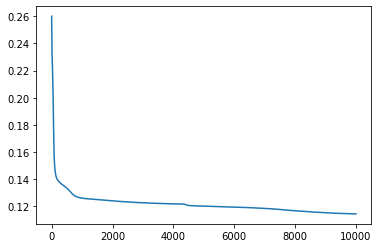

In [0]:
losses = torch.tensor(losses)
train_losses = losses.cpu().detach().numpy()
train_losses
plt.plot(train_losses)